In [115]:
import numpy as np
import matplotlib.pyplot as plt
import tabulate
import latextable

In [116]:
packages = ["adelie", "grpreg", "grplasso", "sparsegl", "gglasso"]

In [117]:
def plot_comparison(snr: str, ps = 2 ** np.arange(4, 21)):
    times = np.genfromtxt(f"data/gl_packages_time_snr_{snr}.csv", delimiter=',')
    objs = np.genfromtxt(f"data/gl_packages_obj_snr_{snr}.csv", delimiter=',')
    n_lmdas = np.genfromtxt(f"data/gl_packages_n_lmda_snr_{snr}.csv", delimiter=',')

    fig, axes = plt.subplots(1, 2, figsize=(10, 6), layout='constrained')
    markers = ['.', 'v', '1', '+', 'x']
    linestyles = ['-', '--', '--', '--', '--']

    # plot benchmark times
    for j in range(len(packages)):
        axes[0].plot(ps, times[:, j], label=packages[j], marker=markers[j], linestyle=linestyles[j], alpha=0.8)
    axes[0].set_xlabel("Number of total features (p)")
    axes[0].set_ylabel("Time (s)")
    axes[0].set_title("Time Comparison")
    axes[0].legend()
    axes[0].set_xscale("log", base=2)
    axes[0].set_yscale('log', base=2)

    # plot objectives
    for j in range(len(packages)):
        axes[1].plot(ps, objs[:, j], label=packages[j], marker=markers[j], linestyle=linestyles[j], alpha=0.8)
    axes[1].set_xlabel("Number of total features (p)")
    axes[1].set_ylabel("Objective")
    axes[1].set_title("Objective at Last Fitted $\\lambda$")
    axes[1].legend()
    axes[1].set_xscale("log", base=2)
    axes[1].set_yscale("log")

    plt.savefig(f"figures/package_comparison_snr_{snr}.pdf", bbox_inches='tight')
    plt.show()
    
    return times, objs, n_lmdas, fig

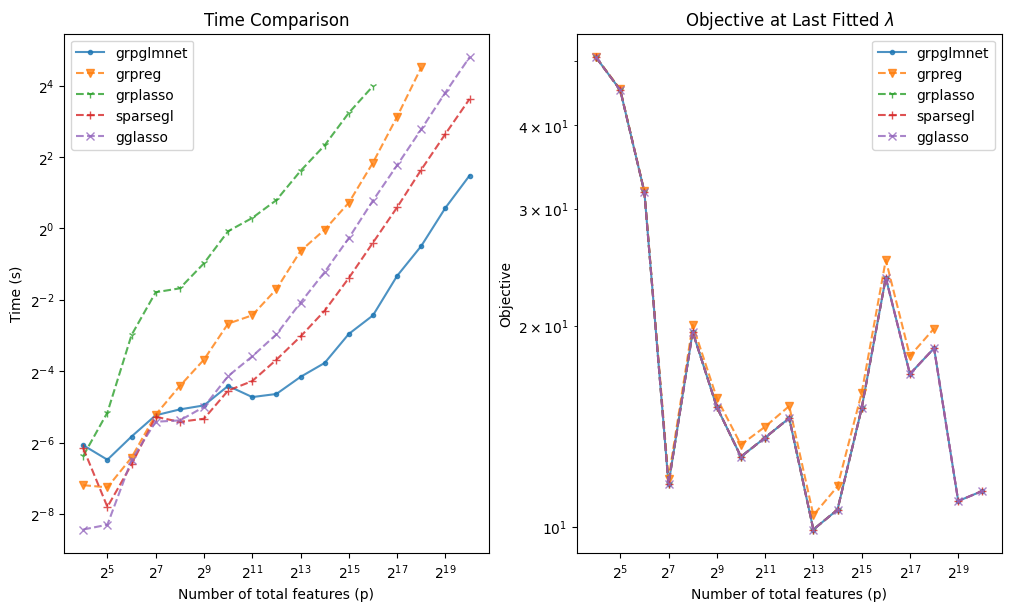

array([[ 0.46037857,  0.81348609,  0.9437005 ,  0.19453909],
       [ 0.58457234,  2.50304446,  0.40010326,  0.2830133 ],
       [ 0.66471275,  7.18323965,  0.58085553,  0.63341538],
       [ 1.01265724, 10.91190918,  0.97011435,  0.88263573],
       [ 1.57536495, 10.50938409,  0.78585339,  0.80702292],
       [ 2.43425295, 15.80692373,  0.77181425,  0.97110737],
       [ 3.35125275, 20.18193645,  0.91286025,  1.20907912],
       [ 4.89532615, 32.44453379,  1.36443521,  2.20607878],
       [ 7.66046373, 43.20303569,  1.94422314,  3.18017478],
       [11.53804683, 54.67740749,  2.1911444 ,  4.23057967],
       [13.31668688, 68.56310952,  2.75675221,  5.84877709],
       [12.79717715, 73.32908441,  2.96357822,  6.44015865],
       [19.42621073, 86.03921694,  4.10712087,  9.30644056],
       [22.03156134,         nan,  3.78706342,  8.57635022],
       [32.07470074,         nan,  4.4031914 ,  9.65347569],
       [        nan,         nan,  4.20460334,  9.40348513],
       [        nan,    

In [125]:
times_1, objs_1, n_lmdas_1, fig_1 = plot_comparison("1")
rel_times_1 = times_1 / times_1[:, 0][:, None]
rel_times_1[:, 1:]

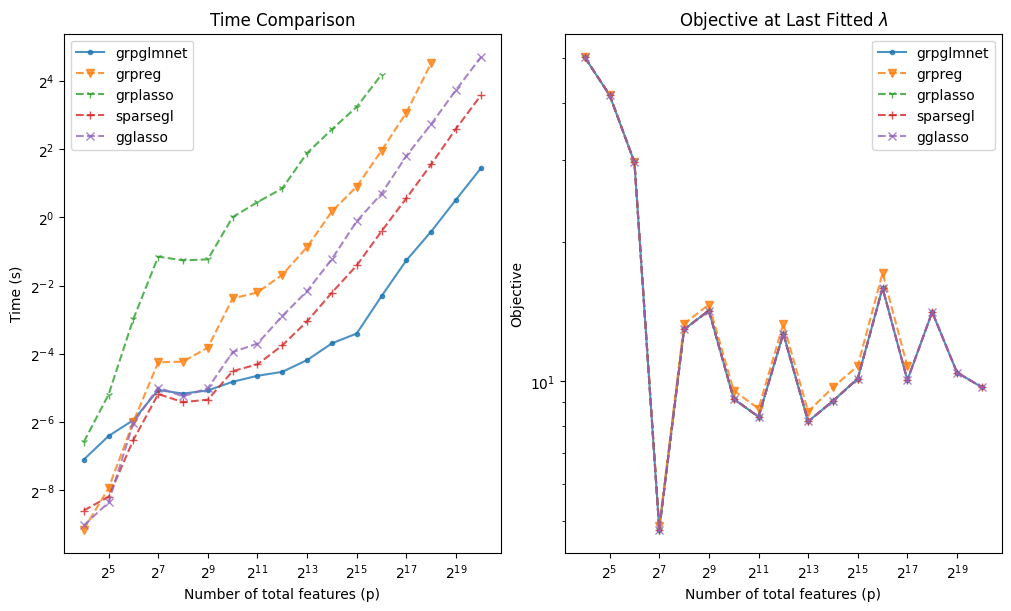

array([[  0.24136526,   1.43074632,   0.35502681,   0.26253865],
       [  0.34707117,   2.32304275,   0.29098999,   0.25901388],
       [  0.96804143,   7.83363972,   0.66993495,   0.94846292],
       [  1.75646343,  15.05937344,   0.92117323,   1.05092148],
       [  1.91652502,  14.98816576,   0.84074811,   0.94481938],
       [  2.38982959,  14.34465454,   0.82870962,   1.04557391],
       [  5.44984602,  28.47555347,   1.24182971,   1.82724683],
       [  5.43705435,  34.0850077 ,   1.26138752,   1.92454099],
       [  7.20308903,  41.64052987,   1.71073701,   3.1074576 ],
       [  9.9602956 ,  67.31014987,   2.19957826,   4.06616812],
       [ 14.61902787,  77.44967592,   2.80239925,   5.55974834],
       [ 19.81888266, 100.16827426,   3.99038604,   9.80161431],
       [ 19.27737424,  90.34931349,   3.74106767,   8.02412659],
       [ 20.1799701 ,          nan,   3.53621565,   8.36693212],
       [ 30.66266196,          nan,   3.91044975,   8.85557189],
       [         nan,    

In [126]:
times_03, objs_03, n_lmdas_03, fig_03 = plot_comparison("03")
rel_times_03 = times_03 / times_03[:, 0][:, None]
rel_times_03[:, 1:]

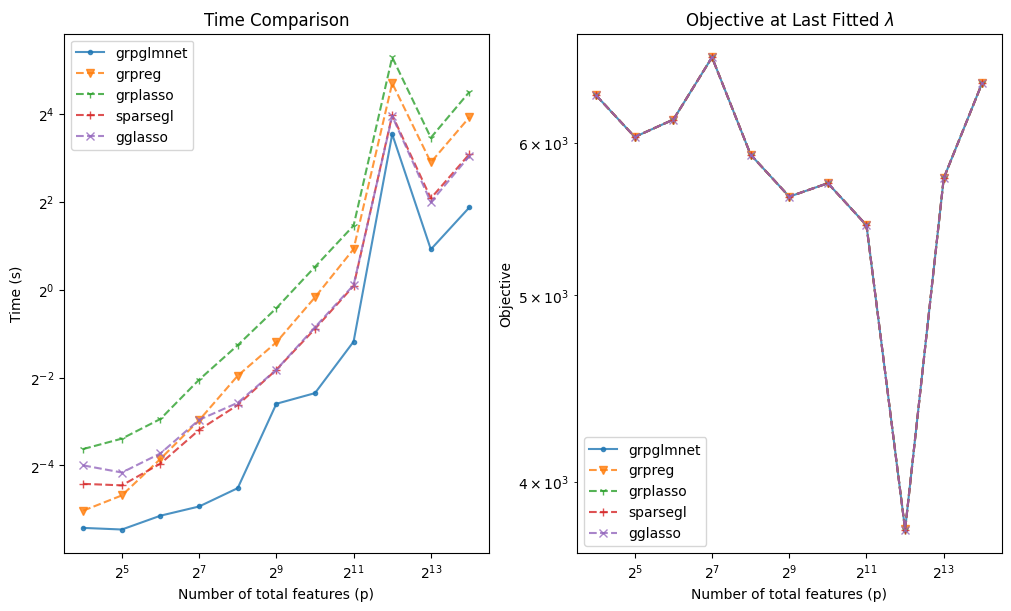

array([[1.31279508, 3.47199863, 2.00327358, 2.68159938],
       [1.71287834, 4.19563409, 2.00728709, 2.45720967],
       [2.45235306, 4.60195375, 2.27480183, 2.67278938],
       [3.89917087, 7.39274031, 3.34783667, 3.92597621],
       [5.89278116, 9.54097013, 3.71174606, 3.84490046],
       [2.63702407, 4.52146439, 1.71076114, 1.71052056],
       [4.53356991, 7.33300285, 2.75742736, 2.82783046],
       [4.30592959, 6.23708731, 2.40439434, 2.43921244],
       [2.23577105, 3.36541559, 1.35235047, 1.32917798],
       [3.94871263, 5.82293227, 2.23800075, 2.1073333 ],
       [4.14221342, 6.18494156, 2.31613141, 2.24844356]])

In [127]:
times_1_nl, objs_1_nl, n_lmdas_1_nl, fig_1_nl = plot_comparison("1_nl", ps=2 ** np.arange(4, 15))
rel_times_1_nl = times_1_nl / times_1_nl[:, 0][:, None]
rel_times_1_nl[:, 1:]

In [128]:
ps = 2 ** np.arange(4, 21)
times_1_table = np.around(np.concatenate((ps[:,None], times_1), axis=-1), decimals=4)
times_1_table_latex = tabulate.tabulate(times_1_table, headers=['p']+packages, tablefmt='latex')
with open("tables/times_1_table.tex", 'w') as f:
    f.write(times_1_table_latex)

In [129]:
ps = 2 ** np.arange(4, 21)
times_03_table = np.around(np.concatenate((ps[:,None], times_03), axis=-1), decimals=4)
times_03_table_latex = tabulate.tabulate(times_03_table, headers=['p']+packages, tablefmt='latex')
with open("tables/times_03_table.tex", 'w') as f:
    f.write(times_03_table_latex)

In [130]:
ps = 2 ** np.arange(4, 15)
times_1_nl_table = np.around(np.concatenate((ps[:,None], times_1_nl), axis=-1), decimals=4)
times_1_nl_table_latex = tabulate.tabulate(times_1_nl_table, headers=['p']+packages, tablefmt='latex')
with open("tables/times_1_nl_table.tex", 'w') as f:
    f.write(times_1_nl_table_latex)